# Signal significance

Combine channels and study signal significance

In [1]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import matplotlib.pyplot as plt

In [23]:
hack_chan1 = ['background_chan1_7.79.csv','glgl1400_neutralino1100_chan1.csv','glgl1600_neutralino800_chan1.csv','monojet_Zp2000.0_DM_50.0_chan1.csv','monotop_200_A_chan1.csv','sqsq1_sq1400_neut800_chan1.csv','sqsq_sq1800_neut800_chan1.csv','stlp_st1000_chan1.csv','stop2b1000_neutralino300_chan1.csv']

datasets = []
for filename in hack_chan1:
    ff = filename.split(sep='_')
    processname = ff[0] if len(ff)<=2 else ff[0]+'_'+ff[1]
    if ff[1]=='technicol': processname += '_'+ff[2]
    datasets += [processname]

bkg = datasets[0]
sig = datasets[1:]


In [121]:
filepath = "txt/signal_efficiencies.txt"
df = pd.read_csv(filepath,delimiter=',',header=None,index_col=False)
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,5j0b0e0m0g,background_chan1,51531,glgl1400_neutralino1100,764,0.8194,0.2866,0.0510,0.0118,glgl1600_neutralino800,...,0.9778,0.6222,0.2222,0.0667,stop2b1000_neutralino300,147,0.9252,0.4966,0.1565,0.0340
1,4j0b0e0m0g,background_chan1,47418,glgl1400_neutralino1100,287,0.5296,0.1185,0.0314,0.0105,glgl1600_neutralino800,...,1.0000,0.6154,0.2308,0.0385,stop2b1000_neutralino300,38,0.8947,0.4474,0.0789,0.0000
2,6j0b0e0m0g,background_chan1,30248,glgl1400_neutralino1100,893,0.6641,0.2508,0.0851,0.0269,glgl1600_neutralino800,...,0.8462,0.6410,0.3846,0.1795,stop2b1000_neutralino300,175,0.7886,0.3657,0.1314,0.0171
3,7j0b0e0m0g,background_chan1,12058,glgl1400_neutralino1100,701,0.6833,0.2996,0.1312,0.0428,glgl1600_neutralino800,...,0.9231,0.6538,0.4231,0.1538,stop2b1000_neutralino300,167,0.7665,0.3772,0.1257,0.0419
4,8j0b0e0m0g,background_chan1,4000,glgl1400_neutralino1100,377,0.7321,0.4324,0.2679,0.1565,glgl1600_neutralino800,...,0.5000,0.3333,0.1667,0.1667,stop2b1000_neutralino300,88,0.8068,0.4773,0.2500,0.1705


In [123]:
signatures = list(df[0])
df[0]

0    5j0b0e0m0g
1    4j0b0e0m0g
2    6j0b0e0m0g
3    7j0b0e0m0g
4    8j0b0e0m0g
Name: 0, dtype: object

In [124]:
Nb = np.array(df[2])
print("Total background: %d" % np.sum(Nb))

signal_eff = {} # Number of signal events for each background efficiency
index=0
for s in sig:
    Ns = df[4+index*6]
    eff_50 = df[4+index*6+1] # 50% bkg efficiency
    eff_10 = df[4+index*6+2] # 10% bkg efficiency
    eff_1 = df[4+index*6+3]  # 1% bkg efficiency
    eff_01 = df[4+index*6+4] # 0.1% bkg efficiency
    Ns_tot = Ns
    Ns_50 = Ns*eff_50
    Ns_10 = Ns*eff_10
    Ns_1  = Ns*eff_1
    Ns_01 = Ns*eff_01
    signal_eff[s] = [Ns_tot,Ns_01,Ns_1,Ns_10,Ns_50]
    index += 1

Total background: 145255


## Significance improvement: epsilon_S / sqrt(epsilon_B)

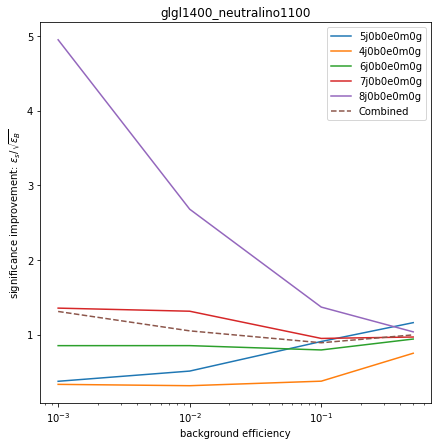

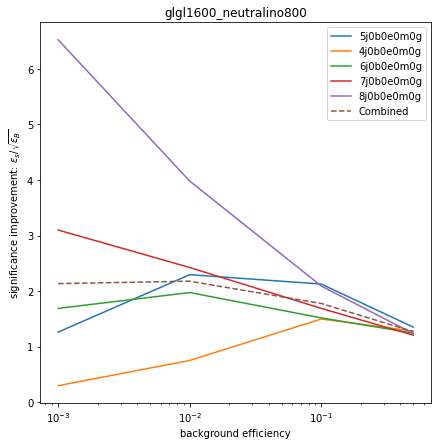

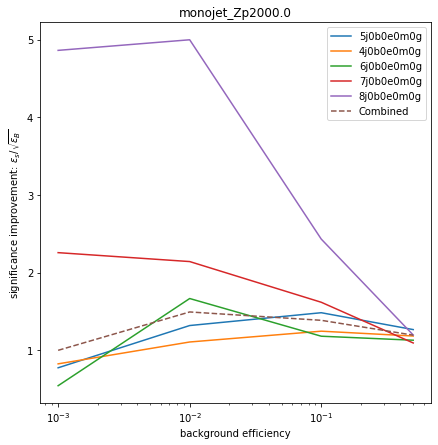

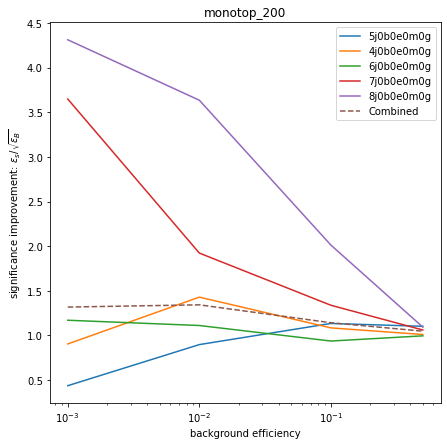

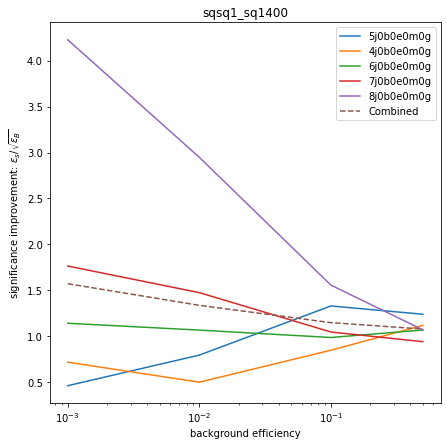

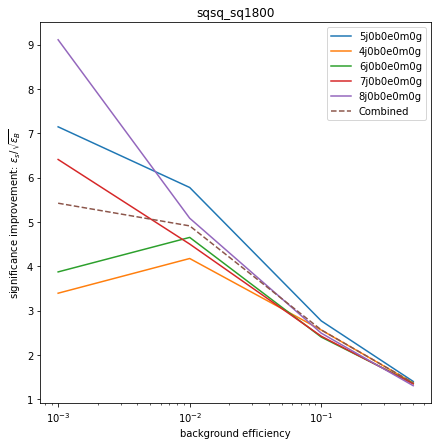

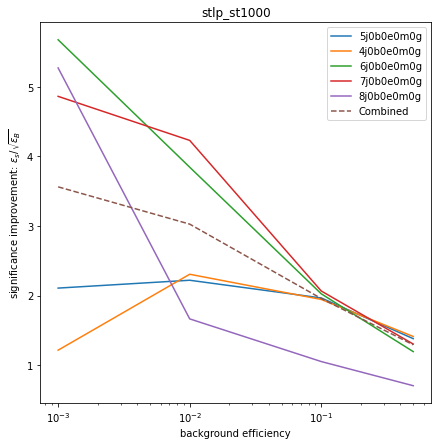

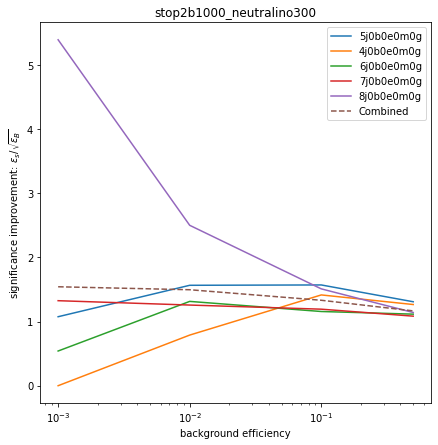

In [140]:
for s in sig:
    plt.figure(figsize=(7,7))
    for channel in np.arange(len(signatures)):
        x = [0.001,0.01,0.1,0.5]
        y = [signal_eff[s][1][channel],signal_eff[s][2][channel],signal_eff[s][3][channel],signal_eff[s][4][channel]]
        eff = y / signal_eff[s][0][channel] # signal efficiency
        significance = eff / np.sqrt(x)     # significance improvement
        plt.plot(x,significance,label=signatures[channel])

    y_tot = [np.sum(signal_eff[s][1]),np.sum(signal_eff[s][2]),np.sum(signal_eff[s][3]),np.sum(signal_eff[s][4])]
    eff_tot = y_tot / np.sum(signal_eff[s][0]) # combined signal efficiency
    significance_tot = eff_tot / np.sqrt(x)    # combined significance improvement
    plt.plot(x,significance_tot,'--',label='Combined')
    plt.xscale('log')
    plt.xlabel('background efficiency')
    plt.ylabel(r'significance improvement: $\epsilon_s / \sqrt{\epsilon_B}$')
    plt.legend()
    plt.title(s)

## Test epsilon_s / sqrt(B)

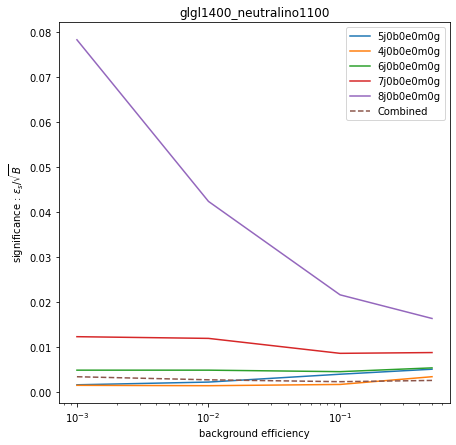

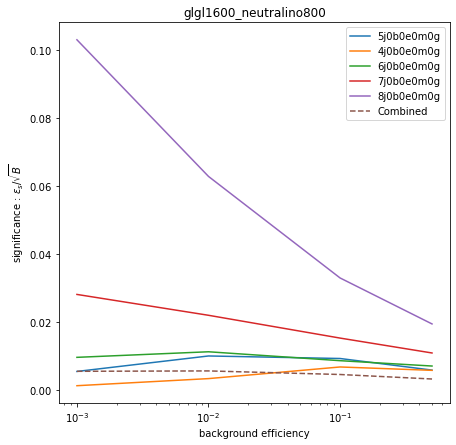

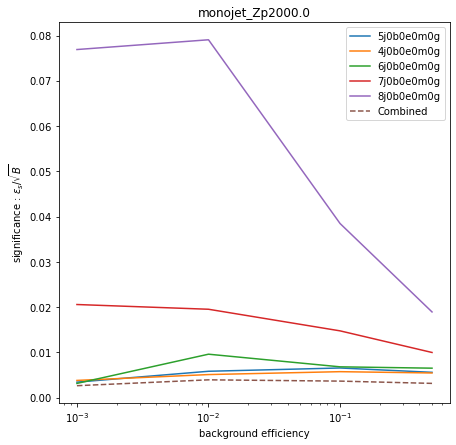

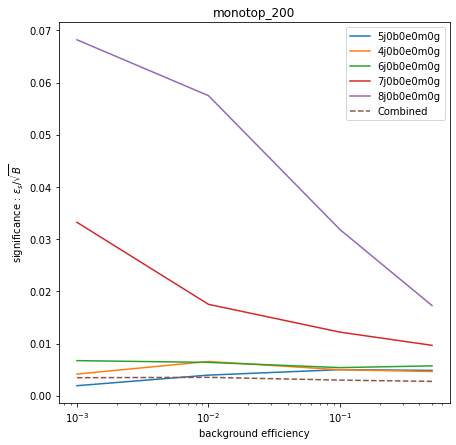

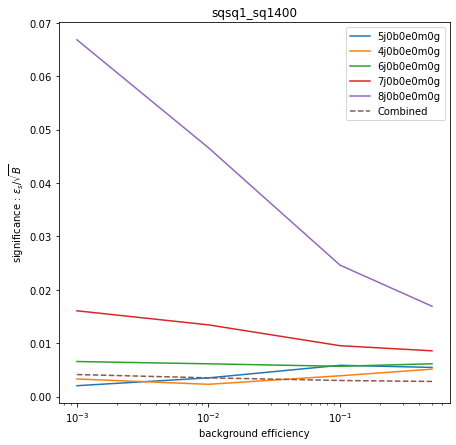

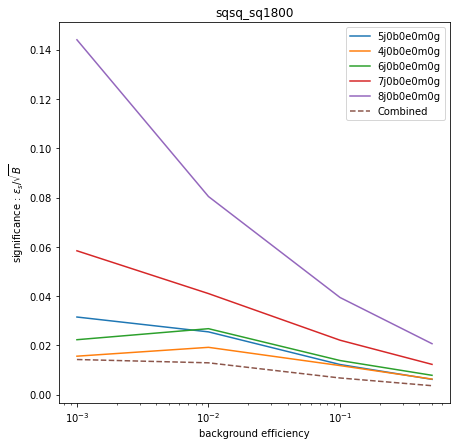

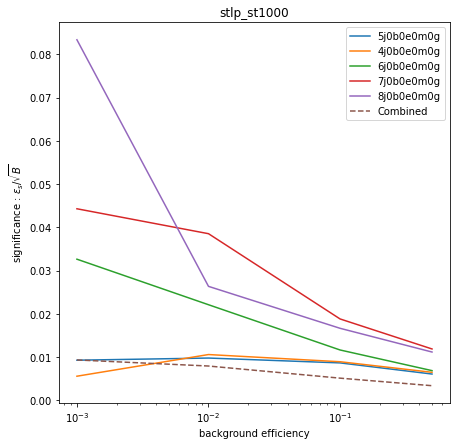

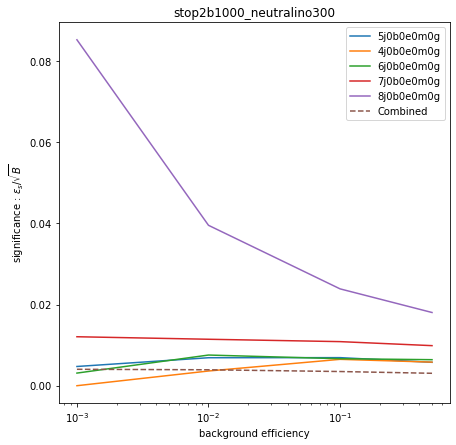

In [163]:
for s in sig:
    plt.figure(figsize=(7,7))
    for channel in np.arange(len(signatures)):
        x = np.array([0.001,0.01,0.1,0.5])
        y = [signal_eff[s][1][channel],signal_eff[s][2][channel],signal_eff[s][3][channel],signal_eff[s][4][channel]]
        eff = y / signal_eff[s][0][channel] # signal efficiency
        significance = eff / np.sqrt(Nb[channel]*x)     # eff_s / sqrt(B)
        plt.plot(x,significance,label=signatures[channel])

    y_tot = [np.sum(signal_eff[s][1]),np.sum(signal_eff[s][2]),np.sum(signal_eff[s][3]),np.sum(signal_eff[s][4])]
    eff_tot = y_tot / np.sum(signal_eff[s][0]) # combined signal efficiency
    significance_tot = eff_tot / np.sqrt(np.sum(Nb)*x)    # combined significance improvement
    plt.plot(x,significance_tot,'--',label='Combined')
    plt.xscale('log')
    plt.xlabel('background efficiency')
    plt.ylabel(r'significance : $\epsilon_s / \sqrt{B}$')
    plt.legend()
    plt.title(s)